<a href="https://colab.research.google.com/github/XMB234/Bioinformatic-Project---DNA-Classification/blob/main/CleanBioinformatic_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 15.5 MB/s eta 0:00:00


In [3]:
# ===============================
# ⚙️ Sistem dan Peringatan
# ===============================
import sys                      # Mengakses parameter sistem (seperti argumen baris perintah)
import warnings                 # Mengelola peringatan runtime
warnings.filterwarnings('ignore')  # Menonaktifkan semua peringatan

# ===============================
# 📊 Komputasi Numerik dan Data
# ===============================
import numpy as np              # Operasi numerik dan array multidimensi
import pandas as pd             # Manipulasi dan analisis data berbasis tabel (DataFrame)

# ===============================
# 📈 Visualisasi Data
# ===============================
import seaborn as sns           # Visualisasi statistik berbasis matplotlib
import matplotlib.pyplot as plt # Visualisasi grafik dasar (plot, histogram, dll)

# ===============================
# 🧠 Machine Learning - Scikit-Learn
# ===============================
from sklearn.model_selection import train_test_split     # Membagi dataset menjadi train dan test
from sklearn.linear_model import PassiveAggressiveClassifier  # Model klasifikasi linear agresif
from sklearn.svm import SVC                               # Support Vector Classifier (SVM)
from sklearn.model_selection import GridSearchCV          # Hyperparameter tuning dengan CV
from sklearn.metrics import accuracy_score, classification_report  # Evaluasi performa model

# ===============================
# 🤖 AutoML dan Benchmarking
# ===============================
from lazypredict.Supervised import LazyClassifier         # Bandingkan banyak model ML secara otomatis

# ===============================
# 🔬 Deep Learning - TensorFlow / Keras
# ===============================
import tensorflow as tf                                   # Library utama untuk deep learning
from tensorflow.keras.models import Sequential            # Model neural network berlapis (sequential)
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, LSTM  # Layer neural network
from tensorflow.keras.optimizers import Adam              # Optimizer Adam untuk training model


In [4]:
# 📂 URL sumber data (dataset promoter gene sequences dari UCI Machine Learning Repository)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data"

# 📥 Membaca data dari URL dan menyimpannya ke DataFrame
# Kolom diberi nama: 'Class' (label), 'id' (identifier), dan 'Sequence' (urutan DNA)
data = pd.read_csv(url, names=['Class', 'id', 'Sequence'])

In [5]:
data.head()

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


In [6]:
# Cek duplikasi data
data.duplicated().sum()

np.int64(0)

In [7]:
# Cek informasi dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     106 non-null    object
 1   id        106 non-null    object
 2   Sequence  106 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


In [8]:
# 📊 Menghitung distribusi nilai pada kolom 'Class'
data['Class'].value_counts()

,count
Class,
+,53
-,53


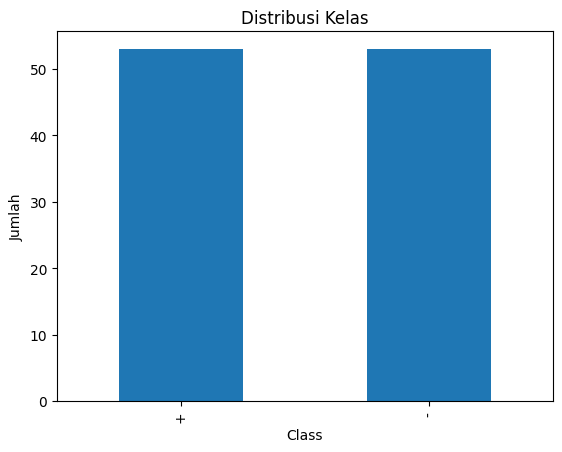

In [9]:
# 🔍 Visualisasi distribusi kelas
data['Class'].value_counts().plot(kind='bar', title='Distribusi Kelas')
plt.xlabel('Class')
plt.ylabel('Jumlah')
plt.show()

In [10]:
# 📦 Membuat dictionary dataset dari sequence + label dengan list comprehension

dataset = {
    i: [x for x in list(seq) if x != '\t'] + [data.loc[i, 'Class']]
    for i, seq in enumerate(data['Sequence'])
}

In [11]:
dataset[0]

['t',
 'a',
 'c',
 't',
 'a',
 'g',
 'c',
 'a',
 'a',
 't',
 'a',
 'c',
 'g',
 'c',
 't',
 't',
 'g',
 'c',
 'g',
 't',
 't',
 'c',
 'g',
 'g',
 't',
 'g',
 'g',
 't',
 't',
 'a',
 'a',
 'g',
 't',
 'a',
 't',
 'g',
 't',
 'a',
 't',
 'a',
 'a',
 't',
 'g',
 'c',
 'g',
 'c',
 'g',
 'g',
 'g',
 'c',
 't',
 't',
 'g',
 't',
 'c',
 'g',
 't',
 '+']

In [12]:
# 📊 Mengonversi dictionary 'dataset' menjadi DataFrame pandas
# Setiap key dictionary menjadi kolom, setiap value (list) menjadi isi kolom tersebut

dframe = pd.DataFrame(dataset)

In [13]:
# Menampilkan dataframe
dframe

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,t,t,g,a,t,a,c,t,c,t,...,c,c,t,a,g,c,g,c,c,t
1,a,g,t,a,c,g,a,t,g,t,...,c,g,a,g,a,c,t,g,t,a
2,c,c,a,t,g,g,g,t,a,t,...,g,c,t,a,g,t,a,c,c,a
3,t,t,c,t,a,g,g,c,c,t,...,a,t,g,g,a,c,t,g,g,c
4,a,a,t,g,t,g,g,t,t,a,...,g,a,a,g,g,a,t,a,t,a
5,g,t,a,t,a,c,g,a,t,a,...,t,g,c,g,c,a,c,c,c,t
6,c,c,g,g,a,a,g,c,a,a,...,a,g,c,t,a,t,t,t,c,t
7,a,c,a,a,t,a,t,a,a,t,...,g,a,g,g,t,g,c,a,t,a
8,a,t,g,t,t,g,g,a,t,t,...,a,c,a,t,g,g,a,c,c,a
9,t,g,a,g,a,g,g,a,a,t,...,c,t,a,a,t,c,a,g,a,t


In [14]:
# 🔄 Melakukan transpose DataFrame supaya:
#    - baris menjadi setiap sampel (data point)
#    - kolom menjadi fitur (nucleotide posisi 1, 2, dst) + label

df = dframe.transpose()


# 📋 Menampilkan 5 baris pertama DataFrame hasil transpose
df.iloc[:5]

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [15]:
# 📊 Menghasilkan ringkasan statistik deskriptif dari DataFrame
# - Untuk kolom numerik: count, mean, std, min, quartiles, max
# - Untuk kolom non-numerik: count, unique, top (nilai paling sering), freq (frekuensi top)

df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
unique,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,2
top,t,a,a,c,a,a,a,a,a,a,...,c,c,c,t,t,c,c,t,t,+
freq,38,34,30,30,36,42,38,34,33,36,...,36,42,31,33,35,32,29,29,34,53


In [16]:
def visualize_target_pie(df, column, filename="target_piechart.png"):
    """
    Membuat dan menyimpan pie chart distribusi kelas dari kolom tertentu di DataFrame.

    Parameters:
    - df: pandas DataFrame
    - column: nama kolom target yang ingin divisualisasi
    - filename: nama file output gambar pie chart (default: "target_piechart.png")
    """

    # Hitung frekuensi setiap kelas
    counts = df[column].value_counts()

    # Label dan ukuran masing-masing slice
    labels = counts.index
    sizes = counts.values

    # Warna untuk dua kelas (bisa diperluas jika lebih banyak kelas)
    colors = ['#4C72B0', '#55A868']

    # Buat figure pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(
        sizes,
        labels=labels,
        colors=colors[:len(labels)],  # Pastikan warna sesuai jumlah kelas
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 12}
    )

    plt.title("Distribution of Promoters and Non-Promoters", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()


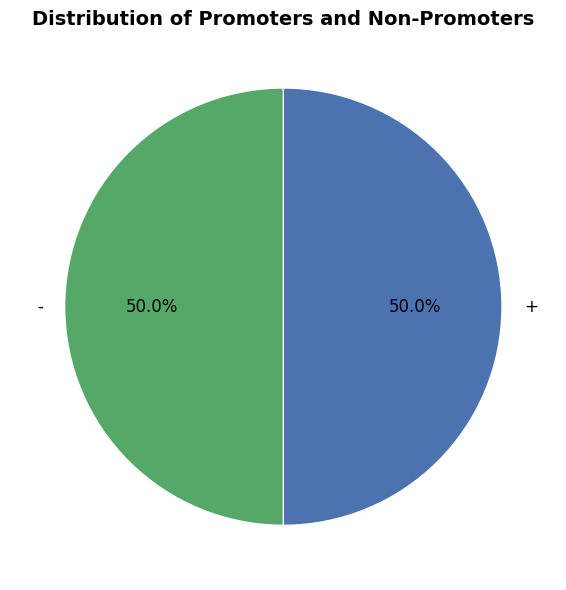

In [17]:
visualize_target_pie(df, column=57)

In [18]:
# 📊 Membuat DataFrame 'details' yang berisi frekuensi nilai unik tiap kolom di 'df'
# Setiap kolom di 'df' dihitung value_counts-nya, lalu disusun menjadi DataFrame baru

details = pd.DataFrame({col: df[col].value_counts() for col in df.columns})

In [19]:
details

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.00
-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.00
a,26.00,34.00,30.00,22.00,36.00,42.00,38.00,34.00,33.00,36.00,...,23.00,24.00,28.00,27.00,25.00,22.00,26.00,24.00,27.00,NaN
c,27.00,22.00,21.00,30.00,19.00,18.00,21.00,20.00,22.00,22.00,...,36.00,42.00,31.00,32.00,21.00,32.00,29.00,29.00,17.00,NaN
g,15.00,24.00,28.00,28.00,29.00,22.00,17.00,20.00,19.00,20.00,...,26.00,18.00,24.00,14.00,25.00,22.00,28.00,24.00,28.00,NaN
t,38.00,26.00,27.00,26.00,22.00,24.00,30.00,32.00,32.00,28.00,...,21.00,22.00,23.00,33.00,35.00,30.00,23.00,29.00,34.00,NaN


In [20]:
# 🔢 Mengubah data kategorikal di 'df' menjadi format numerik menggunakan one-hot encoding
# Setiap kategori unik di setiap kolom diubah menjadi kolom biner (0/1)
numerical_df = pd.get_dummies(df)

# 📋 Tampilkan 5 baris pertama dari DataFrame hasil encoding
numerical_df.head()

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,57_+,57_-
0,False,False,False,True,True,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
1,False,False,False,True,False,False,True,False,False,True,...,True,False,False,False,True,False,False,False,True,False
2,False,False,True,False,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
4,False,False,False,True,False,True,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False


In [21]:
# 🧹 Menghapus kolom '57_-', yang kemungkinan adalah fitur kelas negatif hasil one-hot encoding
# 🔄 Mengganti nama kolom '57_+' menjadi 'Class' untuk menandai kolom label target
df = numerical_df.drop(columns=['57_-']).rename(columns={'57_+': 'Class'})

# 📋 Menampilkan 5 baris pertama DataFrame hasil modifikasi
df.head()

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,54_t,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class
0,False,False,False,True,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,True
1,False,False,False,True,False,False,True,False,False,True,...,False,True,False,False,False,True,False,False,False,True
2,False,False,True,False,False,False,False,True,True,False,...,False,False,True,False,False,False,False,True,False,True
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
4,False,False,False,True,False,True,False,False,False,False,...,True,True,False,False,False,False,False,True,False,True


In [22]:
# 🔄 Mengubah tipe data semua kolom di DataFrame 'df' menjadi integer
# Biasanya untuk memastikan semua fitur bernilai numerik (0/1) dalam format integer

df = df.astype(int)

In [24]:
# 🔀 Membagi dataset menjadi data training dan testing
# - Fitur (X): semua kolom kecuali 'Class', diubah ke array numpy (.values)
# - Target (y): kolom 'Class', diubah ke array numpy (.values)
# - 25% data dipakai untuk testing, sisanya training
# - random_state=1 untuk memastikan pembagian yang sama tiap run (reproducible)

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Class', axis=1).values,
    df['Class'].values,
    test_size=0.25,
    random_state=1
)

In [25]:
X_train.dtype

dtype('int64')

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Konfigurasi
seed = 1
kfold = KFold(n_splits = 10, shuffle = True, random_state = seed)
scoring = 'accuracy'

# Model yang akan diuji
models = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Gaussian Process": GaussianProcessClassifier(1.0 * RBF(1.0)),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "MLP Neural Net": MLPClassifier(alpha=1, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM Linear": SVC(kernel='linear'),
    "SVM RBF": SVC(kernel='rbf'),
    "SVM Sigmoid": SVC(kernel='sigmoid')
}

# Menyimpan Hasil
results = []

# Loop Evaluasi
for name, model in models.items():
  cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  model.fit(X_train, y_train)
  preds = model.predict(X_test)

  acc = accuracy_score(y_test, preds)
  report = classification_report(y_test, preds, output_dict=True)

  results.append({
      "Model": name,
      "CV Mean Acc": round(cv_scores.mean(), 4),
      "CV Std": round(cv_scores.std(), 4),
      "Test Acc": round(acc, 4),
      "Precision_Pos": round(report['1']['precision'], 4),
      "Recall_Pos": round(report['1']['recall'], 4),
      "F1_Pos": round(report['1']['f1-score'], 4)
  })

In [ ]:
# Hasil akhir dalam dataframe
results_df = pd.DataFrame(results).sort_values(by="Test Acc", ascending=False)
results_df

,Model,CV Mean Acc,CV Std,Test Acc,Precision_Pos,Recall_Pos,F1_Pos
7,SVM Linear,0.9125,0.0976,0.9630,0.9091,1.0,0.9524
4,MLP Neural Net,0.9000,0.0935,0.9259,0.8333,1.0,0.9091
9,SVM Sigmoid,0.9250,0.1000,0.9259,0.8333,1.0,0.9091
8,SVM RBF,0.8750,0.1118,0.9259,0.8333,1.0,0.9091
6,Naive Bayes,0.8375,0.1125,0.9259,0.8333,1.0,0.9091
1,Gaussian Process,0.8554,0.1606,0.8889,0.7692,1.0,0.8696
5,AdaBoost,0.8982,0.1230,0.8889,0.7692,1.0,0.8696
0,KNN,0.7964,0.1023,0.7778,0.6250,1.0,0.7692
2,Decision Tree,0.6679,0.1494,0.7778,0.6250,1.0,0.7692
3,Random Forest,0.5964,0.1976,0.7407,0.6154,0.8,0.6957


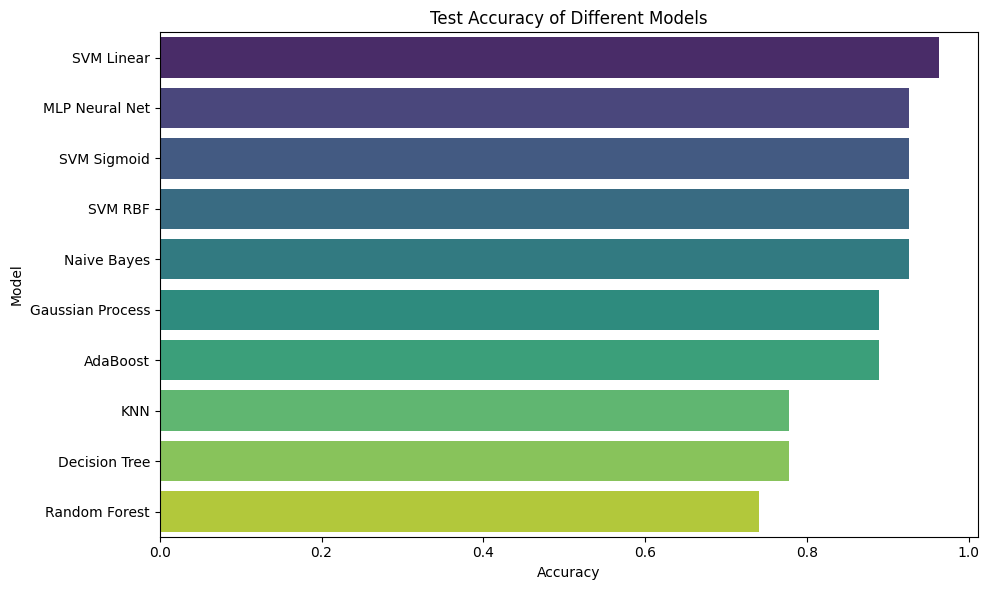

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Test Acc', y='Model', data=results_df, palette='viridis')
plt.title("Test Accuracy of Different Models")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

In [26]:
# Inisiasi dan evaluasi semua model
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Tampilkan Hasil Evaluasi model
print(models)

# Pilih model terbaik berdasarkan akurasi (atau metrik lain, misalnya F1 score, AUC, dll.)
best_model_name = models.sort_values(by='Accuracy', ascending=False).index[0]
best_model = models.loc[best_model_name]

print(f"Best model : {best_model_name}")

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 43, number of negative: 36
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 79, number of used features: 117
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.544304 -> initscore=0.177681
[LightGBM] [Info] Start training from score 0.177681
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

## Fine Tuning

In [27]:
# Inisiasi model PassiveAggressiveClassifier
model = PassiveAggressiveClassifier()

# Definisikan parameter yang akan diuji
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0], # Regulasi
    'max_iter': [1000, 2000],           # Maksimum Iterasi
    'tol': [1e-2 ,1e-3, 1e-4, 1e-5],    # Toleransi untuk berhenti
    'loss': ['hinge', 'squared_hinge'], # Fungsi Kerugian
    'fit_intercept': [True, False],      # Apakah ada Intersep
    'shuffle': [True, False]            # Apakah mengacak sampel
}

# Inisiasi GridSearchCV
grid_search_pac = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit model ke data latih (pastikan sudah siap)
grid_search_pac.fit(X_train, y_train)

# Menampilkan parameter terbaik dan skor validasi
print("Best Parameters:", grid_search_pac.best_params_)
print(f"Best Score: {grid_search_pac.best_score_ * 100:.2f}%")

# Gunakan model terbaik untuk prediksi pada data uji
best_model_pac = grid_search_pac.best_estimator_
y_pred_pac = best_model_pac.predict(X_test)

# Evaluasi akurasi pada data uji
accuracy = accuracy_score(y_test, y_pred_pac)
print(f"Akurasi model terbaik pada data test: {accuracy * 100:.2f}%")

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Best Parameters: {'C': 0.001, 'fit_intercept': True, 'loss': 'hinge', 'max_iter': 1000, 'shuffle': True, 'tol': 0.01}
Best Score: 91.17%
Akurasi model terbaik pada data test: 81.48%


In [28]:
# Inisialisasi model SVM Linear
model = SVC(kernel='linear')

# Definisikan grid parameter untuk dicoba
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],   # Regularisasi
    'tol': [1e-2, 1e-3, 1e-4],      # Toleransi berhenti
    'max_iter': [1000, 2000, 5000], # Maksimum iterasi
    'shrinking': [True, False],     # Gunakan heuristik shrinking
    'probability': [False]          # (True memakan waktu lama, matikan jika tidak perlu)
}

# Inisialisasi GridSearchCV
grid_search_svm = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Latih model
grid_search_svm.fit(X_train, y_train)

# Menampilkan parameter terbaik dan skor validasi
print("Best Parameters:", grid_search_svm.best_params_)
print(f"Best Score: {grid_search_svm.best_score_ * 100:.2f}%")

# Gunakan model terbaik untuk prediksi pada data uji
best_model_svm = grid_search_svm.best_estimator_
y_pred_svm = best_model_svm.predict(X_test)


# Evaluasi performa pada data uji
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Akurasi model terbaik pada data test: {accuracy * 100:.2f}%")


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'C': 0.01, 'max_iter': 1000, 'probability': False, 'shrinking': True, 'tol': 0.01}
Best Score: 91.17%
Akurasi model terbaik pada data test: 88.89%


In [29]:
# Konversi probabilitas menjadi kelas biner (0 atau 1)
y_pred_svm_class = (y_pred_svm > 0.5).astype(int)

In [30]:
df_prediksi_svm = pd.DataFrame({
    "Probabilitas": y_pred_svm.flatten(),
    "Prediksi" : y_pred_svm_class.flatten(),
    "Label Asli" : y_test
})

# Tambahkan kolom apakah prediksi benar atau
df_prediksi_svm["Benar/Salah"] = df_prediksi_svm["Prediksi"] == df_prediksi_svm["Label Asli"]

In [32]:
# 📋 Menampilkan 20 baris pertama dari DataFrame 'df_prediksi_svm'

df_prediksi_svm.head(20)

,Probabilitas,Prediksi,Label Asli,Benar/Salah
0,0,0,0,True
1,1,1,1,True
2,0,0,0,True
3,0,0,0,True
4,1,1,1,True
5,1,1,0,False
6,0,0,0,True
7,0,0,0,True
8,1,1,1,True
9,0,0,0,True


## Deep Learning

In [61]:
# 🔄 Reshape input data ke bentuk (samples, timesteps, features) untuk LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], 57, 4))
X_test_reshaped = X_test.reshape((X_test.shape[0], 57, 4))

# 🧠 Definisikan model Sequential dengan layer Bidirectional LSTM dan Dense
model_bi = Sequential([
    Bidirectional(LSTM(64, return_sequences=False), input_shape=(57, 4)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer untuk klasifikasi biner
])

# ⚙️ Kompilasi model dengan binary crossentropy loss dan optimizer Adam
model_bi.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 🚀 Latih model dengan data training, validasi 20%, 20 epoch, batch size 16
history = model_bi.fit(
    X_train_reshaped, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=16,
    verbose=1
)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 0.5322 - loss: 0.6886 - val_accuracy: 0.6250 - val_loss: 0.6852
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5179 - loss: 0.6900 - val_accuracy: 0.6250 - val_loss: 0.6835
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5346 - loss: 0.6832 - val_accuracy: 0.6250 - val_loss: 0.6810
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5345 - loss: 0.6778 - val_accuracy: 0.6250 - val_loss: 0.6768
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5263 - loss: 0.6731 - val_accuracy: 0.5625 - val_loss: 0.6724
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5851 - loss: 0.6711 - val_accuracy: 0.5000 - val_loss: 0.6646
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6079 - loss: 0.6626 - val_accuracy: 0.4375 - val_loss: 0.6502
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6582 - loss: 0.6143 - val_accuracy: 0.4375 - val_loss: 0.6235

In [62]:
# Prediksi
y_pred_dl = model_bi.predict(X_test_reshaped)

# Konversi probabilitas menjadi kelas biner (0 or 1)
y_pred_class = (y_pred_dl > 0.5).astype(int)

# Evaluasi akurasi dan classification report
print("Accuracy:", accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.77      1.00      0.87        10

    accuracy                           0.89        27
   macro avg       0.88      0.91      0.89        27
weighted avg       0.91      0.89      0.89        27



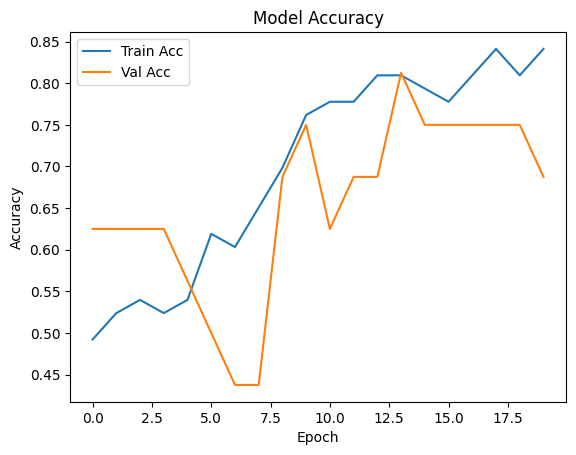

In [63]:
# 📈 Plot grafik akurasi training dan validasi selama epoch
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.show()

In [36]:
# 📊 Membuat DataFrame hasil prediksi model deep learning
# Kolom: probabilitas prediksi, kelas prediksi, dan label asli
df_prediksi = pd.DataFrame({
    "Probabilitas": y_pred_dl.flatten(),
    "Prediksi": y_pred_class.flatten(),
    "Label Asli": y_test
})

# ✔️ Tambahkan kolom baru untuk menandai apakah prediksi benar atau salah (True/False)
df_prediksi["Benar/Salah"] = df_prediksi["Prediksi"] == df_prediksi["Label Asli"]


In [37]:
df_prediksi.head(20)

,Probabilitas,Prediksi,Label Asli,Benar/Salah
0,0.31,0,0,True
1,0.36,0,1,False
2,0.15,0,0,True
3,0.36,0,0,True
4,0.96,1,1,True
5,0.71,1,0,False
6,0.28,0,0,True
7,0.19,0,0,True
8,0.85,1,1,True
9,0.33,0,0,True


## Inference untuk SVM

In [38]:
import numpy as np

def one_hot_encode_flat(seq):
    """
    Mengubah urutan DNA (string) menjadi representasi one-hot encoding
    datar (flattened) dengan format A, C, G, T.

    Parameters:
    - seq: string, urutan nukleotida (contoh: "acgt")

    Returns:
    - numpy array 1D, one-hot encoding flattened dari urutan input
    """
    # 🗺️ Mapping tiap nukleotida ke vektor one-hot
    mapping = {
        'a': [1, 0, 0, 0],
        'c': [0, 1, 0, 0],
        'g': [0, 0, 1, 0],
        't': [0, 0, 0, 1]
    }

    # 🔄 Encoding setiap nukleotida; default [0,0,0,0] jika karakter tidak dikenal
    encoded = [mapping.get(nt.lower(), [0, 0, 0, 0]) for nt in seq]

    # 🔀 Mengubah list 2D ke array numpy 1D (flattened)
    return np.array(encoded).flatten()


In [39]:
# 🧬 Input sekuens DNA dari user (harus panjang 57)
seq_inputs = input("Masukkan sequence DNA (57): ")

# 🔍 Validasi panjang dan karakter sekuens
if len(seq_inputs) != 57 or not set(seq_inputs.lower()).issubset({'a','c','g','t'}):
    print("❌ Sekuens tidak valid. Harus 57 nt dan hanya mengandung A, C, G, T.")
else:
    # 🔢 One-hot encode dan reshape untuk input model SVM
    X_new = one_hot_encode_flat(seq_inputs).reshape(1, -1)

    # 🤖 Prediksi kelas menggunakan model SVM terbaik
    y_pred = best_model_svm.predict(X_new)
    # 🔥 Dapatkan skor confidence dari decision function SVM
    y_prob = best_model_svm.decision_function(X_new)

    # 🖥️ Tampilkan hasil prediksi dan confidence score
    print(f"Prediksi: {'PROMOTER' if y_pred[0] == 1 else 'NON-PROMOTER'}")
    print(f"Confidence score (Decision Function): {y_prob[0]:.4f}")


KeyboardInterrupt: Interrupted by user

## Model gabungan

In [65]:
# Buat model ekstraktor fitur (tanpa output sigmoid)
feature_extractor = Sequential(model_bi.layers[:-1])  # ambil semua layer kecuali output

# Ekstrak fitur dari data latih & uji
X_train_feat = feature_extractor.predict(X_train_reshaped)
X_test_feat = feature_extractor.predict(X_test_reshaped)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [67]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'tol': [1e-2, 1e-3, 1e-4],
    'max_iter': [1000, 2000, 5000],
    'shrinking': [True, False],
    'probability': [True]  # ← wajib True agar bisa dapat probabilitas confidence
}

model = SVC(kernel='linear')

grid_search_svm_hybrid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search_svm_hybrid.fit(X_train_feat, y_train)

# 4. Simpan best model-nya
best_model_svm = grid_search_svm_hybrid.best_estimator_

# 5. Evaluasi
y_pred = best_model_svm.predict(X_test_feat)

from sklearn.metrics import accuracy_score, classification_report
print(f"Akurasi Hybrid BiLSTM + best SVM: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Akurasi Hybrid BiLSTM + best SVM: 88.89%
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.77      1.00      0.87        10

    accuracy                           0.89        27
   macro avg       0.88      0.91      0.89        27
weighted avg       0.91      0.89      0.89        27



In [70]:
def predict_sequence_hybrid(sequence, feature_extractor, svm_model):
    def one_hot_encode_seq(seq):
        mapping = {'a': [1, 0, 0, 0],
                   'c': [0, 1, 0, 0],
                   'g': [0, 0, 1, 0],
                   't': [0, 0, 0, 1]}
        return np.array([mapping.get(nt.lower(), [0, 0, 0, 0]) for nt in seq])

    if len(sequence) != 57:
        return {"error": "Sekuens harus tepat 57 nt!"}

    encoded = one_hot_encode_seq(sequence).reshape(1, 57, 4)
    features = feature_extractor.predict(encoded, verbose=0)
    pred_class = svm_model.predict(features)[0]
    prob = svm_model.predict_proba(features)[0][pred_class]

    return {
        "input_sequence": sequence,
        "prediction": "PROMOTER" if pred_class == 1 else "NON-PROMOTER",
        "confidence": round(prob, 4)
    }

# Contoh penggunaan
sequence = "tataatgcgagtaggttgcccttatagtgttggctgctggcaggccaggcattaaaa"
result = predict_sequence_hybrid(sequence, feature_extractor, best_model_svm)
print(result)


{'input_sequence': 'tataatgcgagtaggttgcccttatagtgttggctgctggcaggccaggcattaaaa', 'prediction': 'NON-PROMOTER', 'confidence': np.float64(0.7449)}
